# Predicción de admisiones estudiantiles con KERAS.

## Mi primera red neuronal ?

Información de la UCLA basada en 3 datos:

   - GRE Scores (Test)
   - GPA Scores (Grades)
   - Class rank (1-4)

El dataset original se encuentra en: http://www.ats.ucla.edu/ y en este mismo apartado corresponde al file *binary.csv* extraido directaemten del sitio.

Debe tener instalado en el ambiente de trabajo Pandas, Keras etc.

# 1. Carga y vizualización de datos:

Para cargar los datos usamos load the data, usaremos un paquete de datos muy útil llamado Pandas. Puede leer en la documentación de Pandas aquí: https://pandas.pydata.org/


In [4]:
import pandas as pd
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
print(data)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
5        1  760  3.00     2
6        1  560  2.98     1
7        0  400  3.08     2
8        1  540  3.39     3
9        0  700  3.92     2
10       0  800  4.00     4
11       0  440  3.22     1
12       1  760  4.00     1
13       0  700  3.08     2
14       1  700  4.00     1
15       0  480  3.44     3
16       0  780  3.87     4
17       0  360  2.56     3
18       0  800  3.75     2
19       1  540  3.81     1
20       0  500  3.17     3
21       1  660  3.63     2
22       0  600  2.82     4
23       0  680  3.19     4
24       1  760  3.35     2
25       1  800  3.66     1
26       1  620  3.61     1
27       1  520  3.74     4
28       1  780  3.22     2
29       0  520  3.29     1
..     ...  ...   ...   ...
370      1  540  3.77     2
371      1  680  3.76     3
372      1  680  2.42     1
373      1  620  3.3

### Visualización de datos:

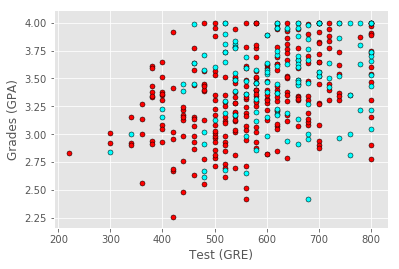

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
plot_points(data)
plt.show()

En apariencia GRADES y TEST no parecen tener relación clara.

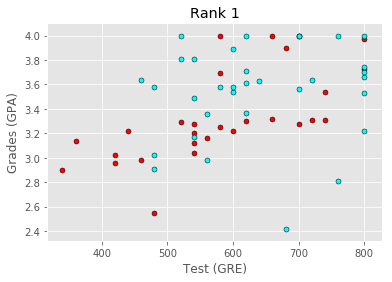

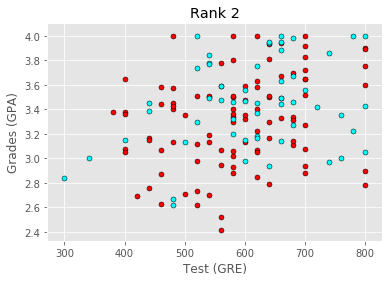

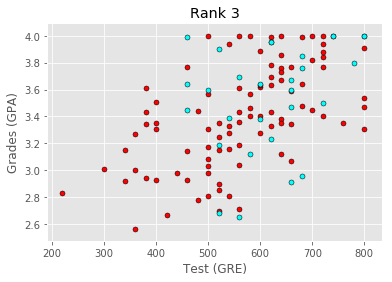

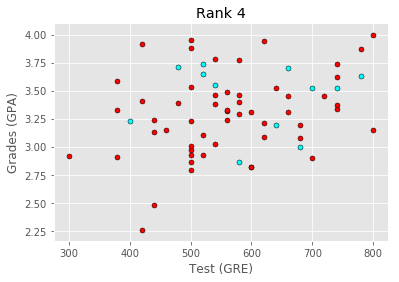

In [6]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

Parece ser que por RANK la relación es un poco más clara en algunos casos, se procede a construir una MLP con RANK, GRE y GPA.

# 2. Procesado de datos:

- Se remueven NaNs
- One-hot encode con rank
- Normalizacion de GRE y GPA, de manera que queden en el rango (0,1)
- Se parten los datos en input X - labels y

In [7]:
import keras
from keras.utils import np_utils

# remove NaNs
data = data.fillna(0)

# One-hot encoding the rank
processed_data = pd.get_dummies(data, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
processed_data["gre"] = processed_data["gre"]/800
processed_data["gpa"] = processed_data["gpa"]/4

# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(data["admit"],2)

In [8]:
# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

('Shape of X:', (400, 6))
('\nShape of y:', (400, 2))

First 10 rows of X
[[ 0.47499999  0.90249997  0.          0.          1.          0.        ]
 [ 0.82499999  0.91750002  0.          0.          1.          0.        ]
 [ 1.          1.          1.          0.          0.          0.        ]
 [ 0.80000001  0.79750001  0.          0.          0.          1.        ]
 [ 0.64999998  0.73250002  0.          0.          0.          1.        ]
 [ 0.94999999  0.75        0.          1.          0.          0.        ]
 [ 0.69999999  0.745       1.          0.          0.          0.        ]
 [ 0.5         0.76999998  0.          1.          0.          0.        ]
 [ 0.67500001  0.84750003  0.          0.          1.          0.        ]
 [ 0.875       0.98000002  0.          1.          0.          0.        ]]

First 10 rows of y
[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]


# 3. Partición de los datos en training y testing:

In [9]:
# break training set into training and validation sets
(X_train, X_test) = X[50:], X[:50]
(y_train, y_test) = y[50:], y[:50]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('x_train shape:', (350, 6))
(350, 'train samples')
(50, 'test samples')


# 4. Definición de la arquitectura de la red neuronal:

In [210]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers import LeakyReLU

# Building the model

model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_274 (Dense)            (None, 128)               896       
_________________________________________________________________
activation_258 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_275 (Dense)            (None, 64)                8256      
_________________________________________________________________
activation_259 (Activation)  (None, 64)                0         
_________________________________________________________________
dense_276 (Dense)            (None, 2)                 130       
_________________________________________________________________
activation_260 (Activation)  (None, 2)                 0         
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


# 5. Entrenamiento del modelo:

In [211]:
# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
#model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

# 6. Score del modelo:

In [183]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 3s 8ms/step
('\n Training Accuracy:', 0.7171428568022592)
50/50 [==============================] - 0s 250us/step
('\n Testing Accuracy:', 0.65999999761581418)


# 7. Play with parameters!

- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada
- epochs? batches?



Un pequeño ejercicio agregando dropout...

In [28]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('tanh'))
model.add(Dropout(.3)) # now using dropout

model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(.2)) # now using dropout

model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dropout(.1)) # now using dropout

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_22 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
__________

In [29]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)

In [30]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 330us/step

 Training Accuracy: 0.7285714309556144
50/50 [==============================] - 0s 41us/step

 Testing Accuracy: 0.6799999976158142


## Mejora en el modelo anterior (Tarea)...

# Estudiante: Jason Solano

Se mejora el modelo del acurracy de trainning, sin embargo al comprobar el test se observa un overfitting

Modelo

In [285]:
model = Sequential()

model.add(Dense(1024, input_dim=6))
model.add(Activation('relu'))
model.add(Dropout(.3)) # now using dropout

model.add(Dense(512))
model.add(Activation('tanh'))
model.add(Dropout(.2)) # now using dropout

model.add(Dense(258))
model.add(Activation('tanh'))
model.add(Dropout(.1)) # now using dropout

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_395 (Dense)            (None, 1024)              7168      
_________________________________________________________________
activation_379 (Activation)  (None, 1024)              0         
_________________________________________________________________
dropout_241 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_396 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_380 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_242 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_397 (Dense)            (None, 258)               132354    
__________

In [286]:
# Training the model
model.fit(X_train, y_train,epochs=500, batch_size=None, verbose=1,steps_per_epoch=100)

Epoch 1/500
100/100 [==============================] - 18s 178ms/step - loss: 0.5853 - acc: 0.7051
Epoch 2/500
100/100 [==============================] - 9s 91ms/step - loss: 0.5619 - acc: 0.7138
Epoch 3/500
100/100 [==============================] - 9s 91ms/step - loss: 0.5465 - acc: 0.7199
Epoch 4/500
100/100 [==============================] - 9s 91ms/step - loss: 0.5370 - acc: 0.7233
Epoch 5/500
100/100 [==============================] - 9s 92ms/step - loss: 0.5316 - acc: 0.7258
Epoch 6/500
100/100 [==============================] - 9s 93ms/step - loss: 0.5280 - acc: 0.7273
Epoch 7/500
100/100 [==============================] - 9s 91ms/step - loss: 0.5222 - acc: 0.7290
Epoch 8/500
100/100 [==============================] - 9s 90ms/step - loss: 0.5157 - acc: 0.7305
Epoch 9/500
100/100 [==============================] - 9s 91ms/step - loss: 0.5101 - acc: 0.7322
Epoch 10/500
100/100 [==============================] - 9s 91ms/step - loss: 0.5057 - acc: 0.7329
Epoch 11/500
100/100 [=====

100/100 [==============================] - 9s 89ms/step - loss: 0.3973 - acc: 0.7599
Epoch 167/500
100/100 [==============================] - 9s 89ms/step - loss: 0.3981 - acc: 0.7599
Epoch 168/500
100/100 [==============================] - 9s 90ms/step - loss: 0.3992 - acc: 0.7593
Epoch 169/500
100/100 [==============================] - 9s 89ms/step - loss: 0.3973 - acc: 0.7596
Epoch 170/500
100/100 [==============================] - 9s 90ms/step - loss: 0.3965 - acc: 0.7605
Epoch 171/500
100/100 [==============================] - 9s 90ms/step - loss: 0.3993 - acc: 0.7588
Epoch 172/500
100/100 [==============================] - 9s 88ms/step - loss: 0.3984 - acc: 0.7604
Epoch 173/500
100/100 [==============================] - 9s 91ms/step - loss: 0.3986 - acc: 0.7594
Epoch 174/500
100/100 [==============================] - 9s 91ms/step - loss: 0.3969 - acc: 0.7599
Epoch 175/500
100/100 [==============================] - 9s 88ms/step - loss: 0.3981 - acc: 0.7594
Epoch 176/500
100/100 [=

100/100 [==============================] - 9s 89ms/step - loss: 0.3586 - acc: 0.7719
Epoch 331/500
100/100 [==============================] - 9s 88ms/step - loss: 0.3574 - acc: 0.7731
Epoch 332/500
100/100 [==============================] - 9s 88ms/step - loss: 0.3564 - acc: 0.7746
Epoch 333/500
100/100 [==============================] - 9s 89ms/step - loss: 0.3576 - acc: 0.7733
Epoch 334/500
100/100 [==============================] - 9s 90ms/step - loss: 0.3565 - acc: 0.7732
Epoch 335/500
100/100 [==============================] - 9s 89ms/step - loss: 0.3558 - acc: 0.7721
Epoch 336/500
100/100 [==============================] - 9s 89ms/step - loss: 0.3599 - acc: 0.7739
Epoch 337/500
100/100 [==============================] - 9s 88ms/step - loss: 0.3567 - acc: 0.7739
Epoch 338/500
100/100 [==============================] - 9s 90ms/step - loss: 0.3580 - acc: 0.7731
Epoch 339/500
100/100 [==============================] - 9s 91ms/step - loss: 0.3567 - acc: 0.7731
Epoch 340/500
100/100 [=

100/100 [==============================] - 9s 90ms/step - loss: 0.2884 - acc: 0.8407
Epoch 495/500
100/100 [==============================] - 9s 90ms/step - loss: 0.2880 - acc: 0.8410
Epoch 496/500
100/100 [==============================] - 9s 89ms/step - loss: 0.2869 - acc: 0.8404
Epoch 497/500
100/100 [==============================] - 9s 89ms/step - loss: 0.2894 - acc: 0.8412
Epoch 498/500
100/100 [==============================] - 9s 90ms/step - loss: 0.2871 - acc: 0.8409
Epoch 499/500
100/100 [==============================] - 9s 89ms/step - loss: 0.2846 - acc: 0.8405
Epoch 500/500
100/100 [==============================] - 9s 88ms/step - loss: 0.2883 - acc: 0.8391


In [287]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 4s 11ms/step
('\n Training Accuracy:', 0.85714285816465108)
50/50 [==============================] - 0s 456us/step
('\n Testing Accuracy:', 0.60000000953674315)


Se Mejora el testing Test

In [390]:
model = Sequential()

model.add(Dense(12, input_dim=6))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(24))
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_495 (Dense)            (None, 12)                84        
_________________________________________________________________
activation_479 (Activation)  (None, 12)                0         
_________________________________________________________________
dropout_308 (Dropout)        (None, 12)                0         
_________________________________________________________________
dense_496 (Dense)            (None, 24)                312       
_________________________________________________________________
activation_480 (Activation)  (None, 24)                0         
_________________________________________________________________
dropout_309 (Dropout)        (None, 24)                0         
_________________________________________________________________
dense_497 (Dense)            (None, 2)                 50        
__________

In [391]:
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

In [392]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 4s 12ms/step
('\n Training Accuracy:', 0.71142857347215926)
50/50 [==============================] - 0s 448us/step
('\n Testing Accuracy:', 0.68000000953674311)
